In [1]:
!pip install -U yellowbrick
import yellowbrick
yellowbrick.__version__

# Warningについて
# Yellowbrickとscikit-learnのバージョン違いで注意 (Warning) が出ることがある． また，最適化が収束しないと注意 (Warning) が出ることがある．

# 鬱陶しい場合には，以下のコードを実行しておく．

from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)
simplefilter(action='ignore', category=FutureWarning)

#線形回帰

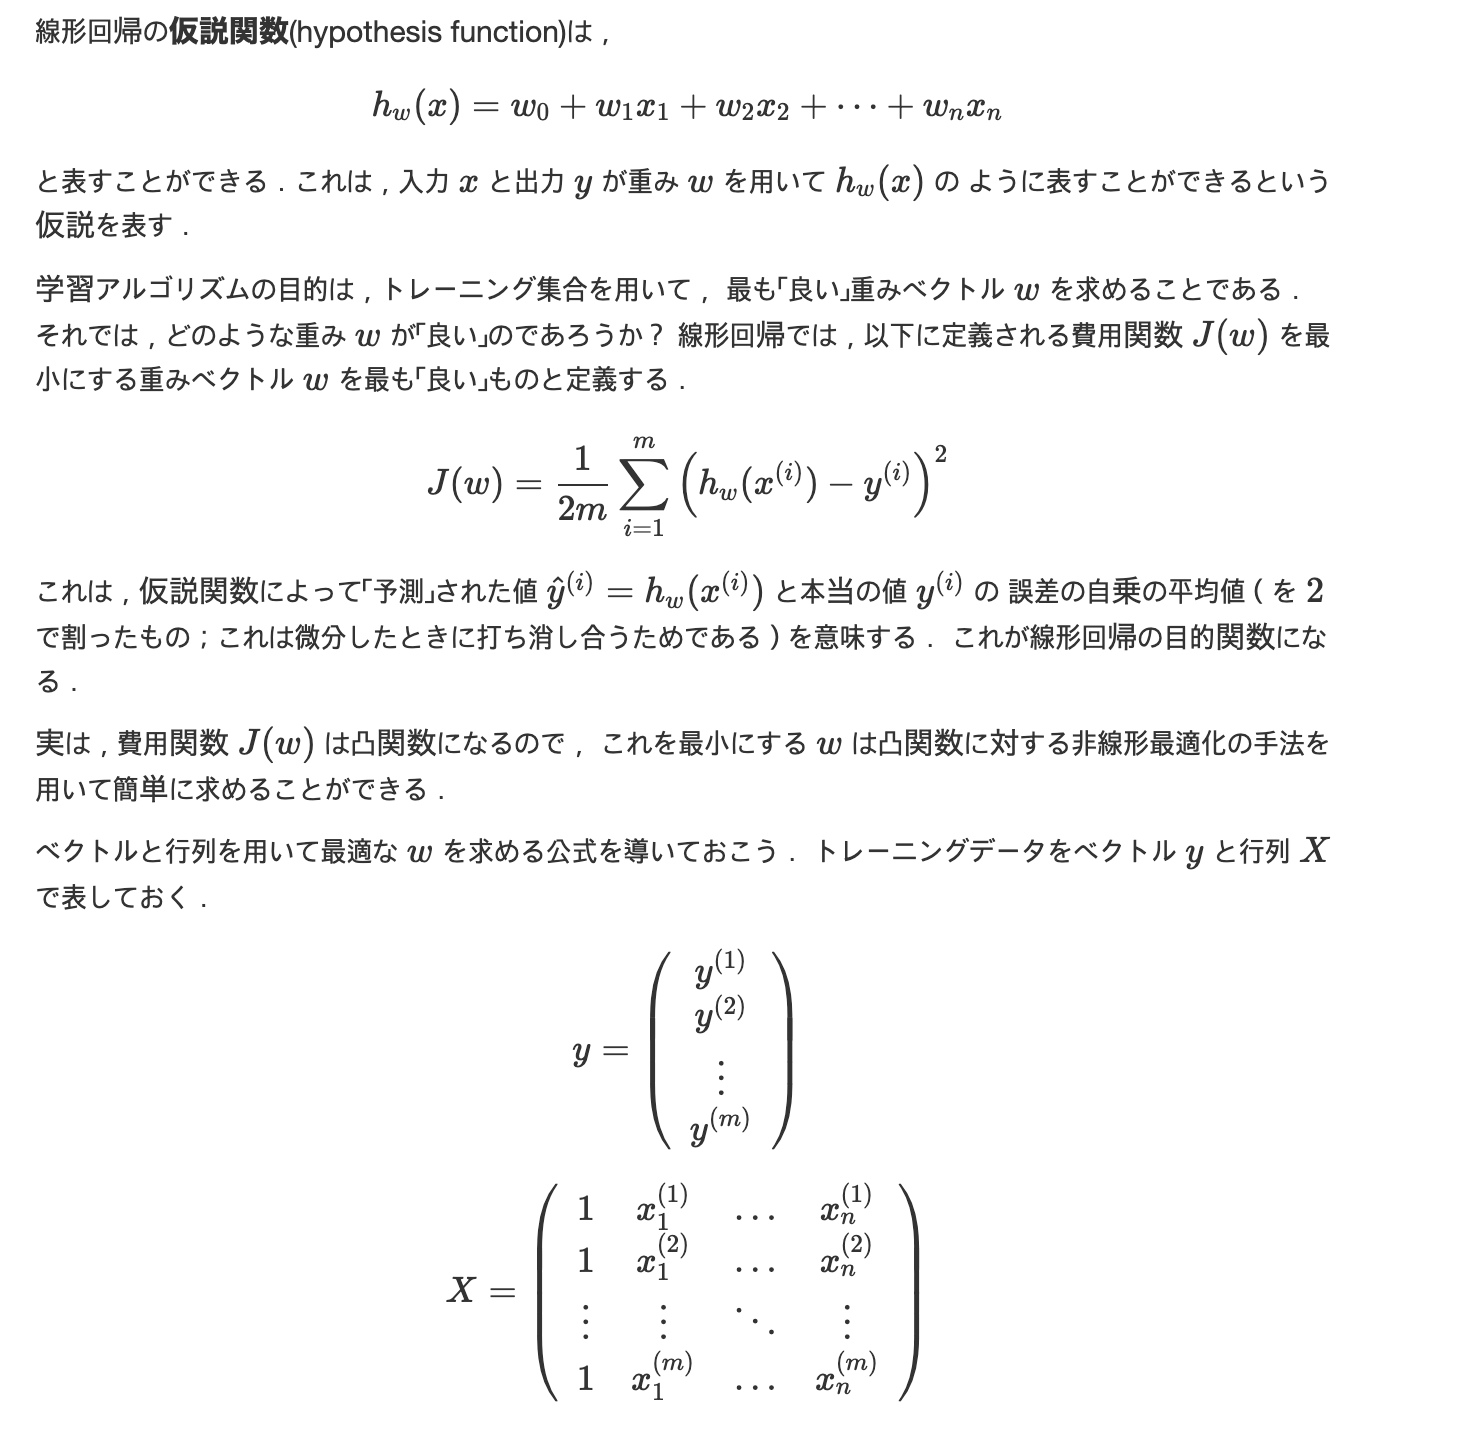

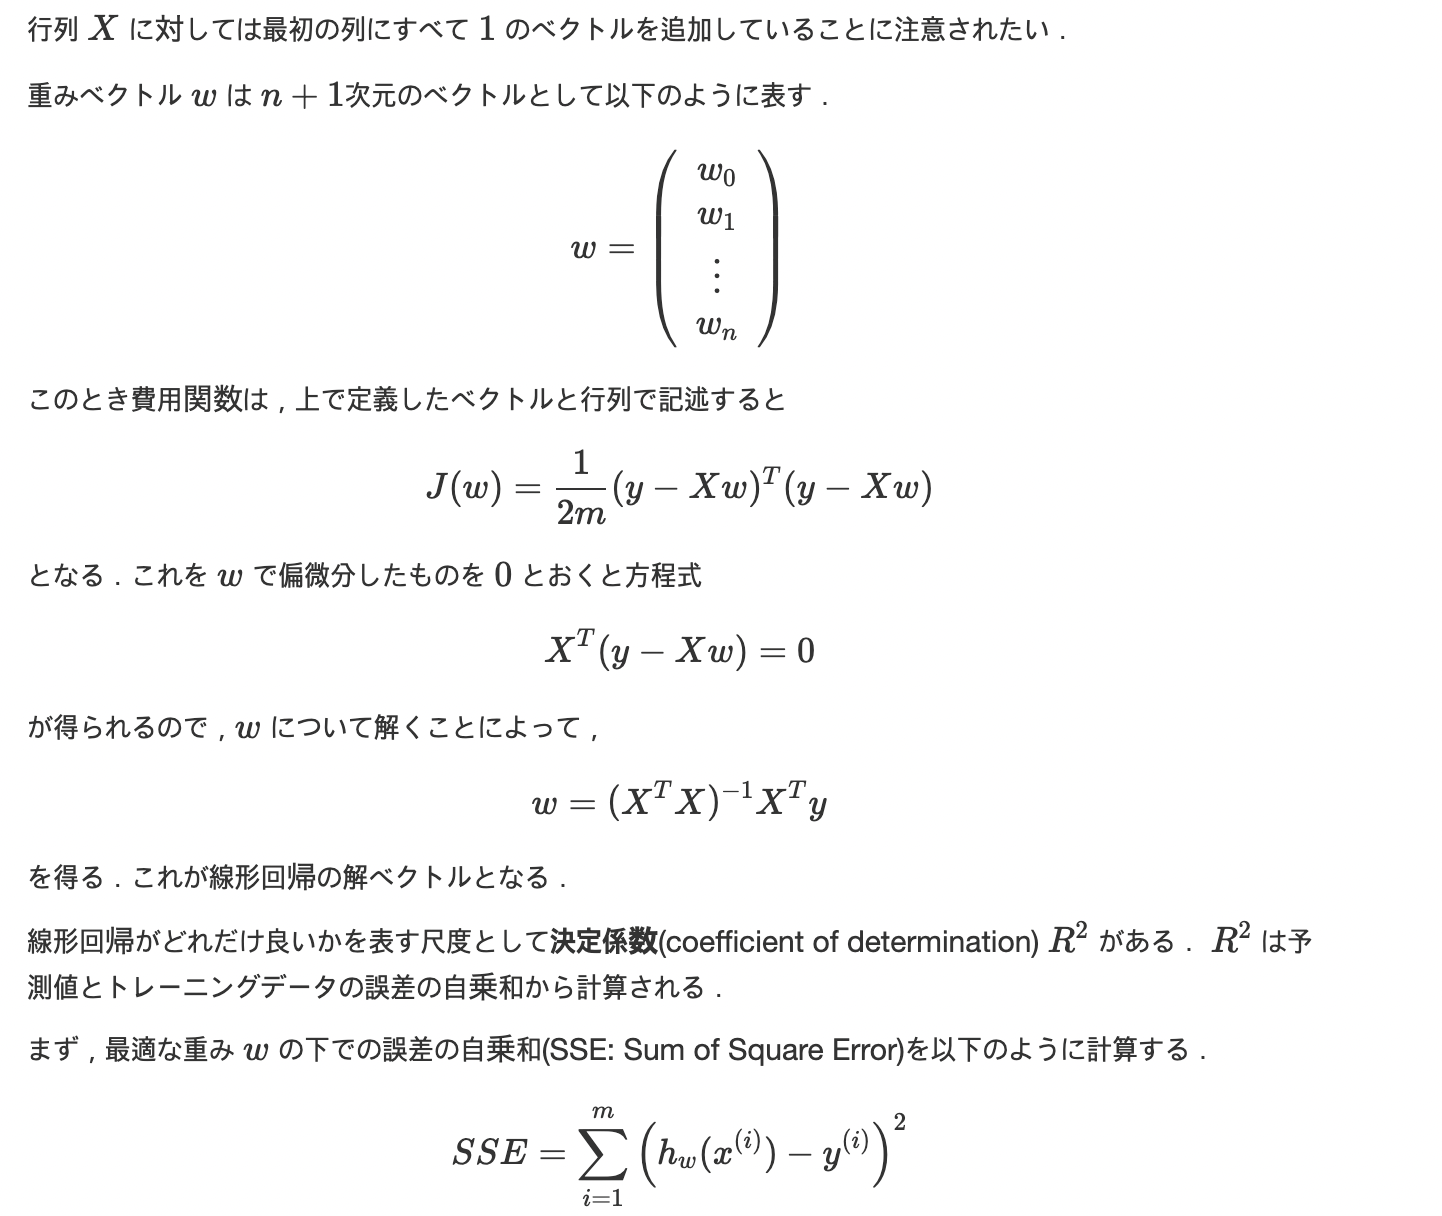

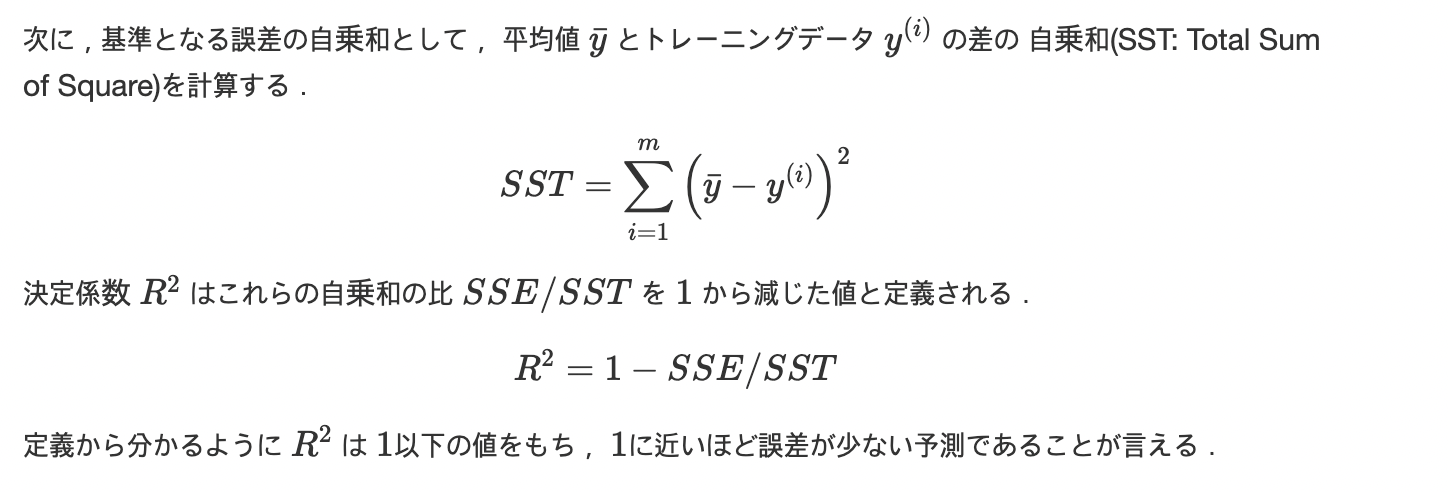

#広告による売り上げの予測

In [2]:
# 広告のデータ http://logopt.com/data/Advertising.csv を用いる．
# テレビ(TV)，ラジオ(Radio)，新聞(Newspaper)への広告から売り上げ(Sales)を予測する．

import pandas as pd #まずはpandasモジュールを準備する．

In [3]:
df = pd.read_csv('http://logopt.com/data/Advertising.csv', index_col =0) #0行目をインデックスにする．
df.tail()

,TV,Radio,Newspaper,Sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [4]:
# 独立変数（特徴ベクトル）X は TV, Radio, Newspaperの列，従属変数（ターゲット） y は Salesの列

# 独立変数（特徴ベクトル:X） - 予測に使うデータ
# 従属変数（ターゲット:y） - 予測する対象

y = df['Sales']

# 列の名前のリスト
X = df[['TV', 'Radio', 'Newspaper']] # df.drop("Sales",axis=1) でも同じ
X.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


#scikit-learnの基本手順

In [5]:
# scikit-learnの機械学習の基本手順は統一されている

# 手順１：クラスをインポートして，インスタンスを生成する．
# 手順２：fitメソッドを用いて，データから訓練する．
# 手順３：predictメソッドを用いて予測を行う．

In [6]:
from sklearn.linear_model import LinearRegression #手順１:線形回帰クラス LinearRegression のインポート
reg = LinearRegression() # 手順1:線形回帰クラスのインスタンス reg 生成
reg.fit(X, y)           # 手順2:fitによる訓練, fit(特長ベクトル, ターゲット　)
yhat = reg.predict(X)   # 手順3:predictによる予測,本来は違うデータで予想する、今回はそのまま使う

#予想したものを確認する
print("y-切片= ",reg.intercept_) #何も広告しなくても2.93ぐらいは売上がある
print("係数 = ",reg.coef_) #coefficient - 

#ラジオが売上が高いという結果が出た(係数が高い順)

y-切片=  2.938889369459412
係数 =  [ 0.04576465  0.18853002 -0.00103749]


In [7]:
# yとy^の誤差を確認する
SSE = ((yhat-y)**2).sum()      # Sum of Square Error,自乗して和をとる
SST = ((y.mean()-y)**2).sum()  # Total Sum of Square,SSEがどれだけいいか評価する
print("R2 =", 1-SSE/SST)       # 決定係数 R^2,なるべく１に近い方がいい,平均より悪い場合は負になる負になる

R2 = 0.8972106381789522


In [8]:
print(reg.score(X,y)) #決定係数の別計算,上記の計算をしなくてもこれでyとy^の誤差を確認できる

0.8972106381789522


#可視化（回帰）

In [9]:
# Yellowbrickパッケージを用いる．
# https://www.scikit-yb.org/en/latest/index.html
# インストール
!pip install -U yellowbrick

#可視化の基本手順

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


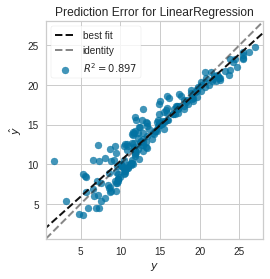

In [10]:
# 手順１：クラスをインポートして，可視化インスタンスを生成する．
# 手順２：fitメソッドで，データを用いて訓練する．
# 手順３：scoreメソッドを用いて評価尺度を計算する．
# 手順４：showメソッドを用いて図を表示する．

# 回帰に対しては，以下の2種類がある．
# 予測誤差 (PredictionError)
# 残差プロット (ResidualPlot)

from yellowbrick.regressor import PredictionError ## 手順１：クラスをインポート

visualizer = PredictionError(reg) #可視化インスタンスを生成する．

visualizer.fit(X, y) # 手順２：fitメソッドで，データを用いて訓練する． 
visualizer.score(X, y)  # 手順３：scoreメソッドを用いて評価尺度を計算する．
visualizer.show(); # 手順４：showメソッドを用いて図を表示する．

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


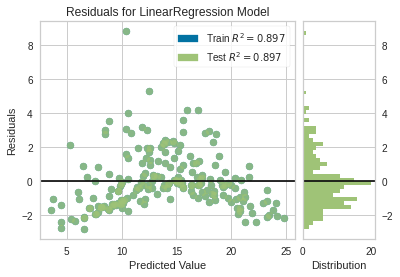

In [11]:
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(reg)

visualizer.fit(X, y)  
visualizer.score(X, y)  
visualizer.show(); #0に近ければ良い(均等に分布していれば良い)

In [12]:
# 問題 (SAT,GPA)
# http://logopt.com/data/SATGPA.csv データを用いて，2種類のSATの成績からGPAを予測せよ． さらに結果の可視化を行え．


In [13]:
# 問題（住宅価格）
# http://logopt.com/data/Boston.csv のBostonの住宅データを用いて回帰分析を行え． 
# さらに結果の可視化を行え． medvが住宅の価格で，他のデータ（犯罪率や人口など）から予測する．

In [14]:
# 問題（車の燃費）
# http://logopt.com/data/Auto.csv の車の燃費のデータを用いて回帰分析を行え． さらに結果の可視化を行え．

# データの詳細については，

# https://vincentarelbundock.github.io/Rdatasets/doc/ISLR/Auto.html

# を参照せよ．

# 最初の列が燃費（mpg: Mile Per Gallon)であり，これを他の列の情報を用いて予測する．最後の列は車名なので無視して良い．

car = pd.read_csv("http://logopt.com/data/Auto.csv", index_col=0)
car.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [15]:
# 問題（コンクリートの強度）
# 以下のコンクリートの強度の例題に対して，strength列の強度を他の列の情報から，線形回帰を用いて推定せよ． さらに結果の可視化を行え．

concrete = pd.read_csv("http://logopt.com/data/concrete.csv")
concrete.head()

,cement,slag,ash,water,splast,coarse,fine,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [16]:
# 問題（シェアバイク）
# 以下のシェアバイクのデータに対して，riders列が利用者数を，線形回帰を用いて推定せよ．ただし，date列とcasual列は除いてから回帰を行え． さらに結果の可視化を行え．

# また，なぜcasual列を含めて推定をしないのか考察せよ．

bikeshare = pd.read_csv("http://logopt.com/data/bikeshare.csv")
bikeshare.head()

,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,feelslike,humidity,windspeed,casual,registered,riders
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


#ダミー変数を用いた回帰

In [17]:
# ダイヤモンドの価格の予測（ダミー変数）
# http://logopt.com/data/Diamond.csv からダイアモンドの価格データを読み込み，線形回帰による予測を行う．

# 列は ["carat","colour","clarity","certification","price"] であり，他の情報から価格(price)の予測を行え．

# カラット(carat)以外の列は情報が文字列として保管されている．
# これはカテゴリー変数とよばれ，sciki-learnで扱うには，数値に変換する必要がある．

# pandasのget_dummies関数で数値情報（ダミー変数）に変換してから，線形回帰を行う．
# たとえば，色を表すcolour列はD,E,F,G,H,Iの文字列が入っている．これを各値が入っているとき1，それ以外のとき0の数値に変換したものがダミー変数になる．

# 色はいずれかの値をとるので，ダミー変数は独立でない（1つが1になると，他のすべては0になる）．
# 最初のダミー変数を除くには，get_dummies関数の引数のdrop_firstをTrueに設定すれば良い．

import pandas as pd
diamond = pd.read_csv('http://logopt.com/data/Diamond.csv', index_col=0)
diamond.head()

,carat,colour,clarity,certification,price
1,0.30,D,VS2,GIA,1302
2,0.30,E,VS1,GIA,1510
3,0.30,G,VVS1,GIA,1510
4,0.30,G,VS1,GIA,1260
5,0.31,D,VS1,GIA,1641


In [18]:
diamond = pd.get_dummies(diamond, drop_first=True) #drop_first=True - ダミー変数の最初のものを除く
#diamond = pd.get_dummies(diamond) # 除かなくても結果は同じ
diamond.head()

,carat,price,colour_E,colour_F,colour_G,colour_H,colour_I,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,certification_HRD,certification_IGI
1,0.30,1302,0,0,0,0,0,0,1,0,0,0,0
2,0.30,1510,1,0,0,0,0,1,0,0,0,0,0
3,0.30,1510,0,0,1,0,0,0,0,1,0,0,0
4,0.30,1260,0,0,1,0,0,1,0,0,0,0,0
5,0.31,1641,0,0,0,0,0,1,0,0,0,0,0


In [19]:
y = diamond.price                # 従属変数(price)の抽出
X = diamond.drop('price',axis=1) # 独立変数（特徴ベクトル）をpriceの列を除くことによって生成
X.head()

,carat,colour_E,colour_F,colour_G,colour_H,colour_I,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,certification_HRD,certification_IGI
1,0.30,0,0,0,0,0,0,1,0,0,0,0
2,0.30,1,0,0,0,0,1,0,0,0,0,0
3,0.30,0,0,1,0,0,0,0,1,0,0,0
4,0.30,0,0,1,0,0,1,0,0,0,0,0
5,0.31,0,0,0,0,0,1,0,0,0,0,0


In [20]:
from sklearn.linear_model import LinearRegression #線形回帰クラスのインポート
reg = LinearRegression() # 線形回帰クラスのインスタンス生成
reg.fit(X, y)           # 訓練
yhat = reg.predict(X)   # 予測

In [21]:
print("y-切片= ",reg.intercept_)
print("係数 = ",reg.coef_)
print("決定変数= ",reg.score(X,y)) #決定係数の別計算

# 決定変数 = 0.9581280577870392は非常に良い

y-切片=  169.17604383492744
係数 =  [12766.39597047 -1439.0853427  -1841.69054716 -2176.67218633
 -2747.14998002 -3313.1023993  -1474.56614749 -1792.01092358
  -689.29043537 -1191.16426364    15.22672874   141.2624469 ]
決定変数=  0.9581280577870392


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


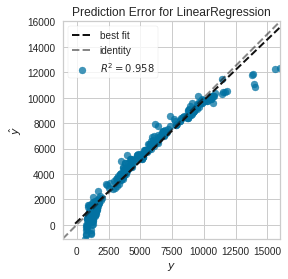

In [22]:
visualizer = PredictionError(reg)

visualizer.fit(X, y)  
visualizer.score(X, y)  
visualizer.show();

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


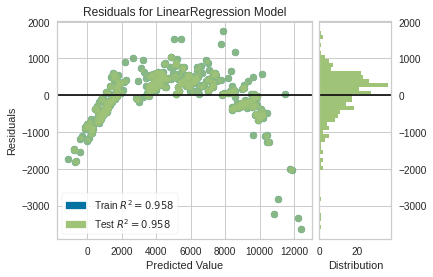

In [23]:
visualizer = ResidualsPlot(reg)

visualizer.fit(X, y)  
visualizer.score(X, y)  
visualizer.show();

#誤差が均等ではない

In [24]:
# 問題（車の価格）
# http://logopt.com/data/carprice.csv から車の価格データを読み込み，線形回帰による予測を行え． また，結果を可視化せよ．

# データの詳細は https://vincentarelbundock.github.io/Rdatasets/doc/DAAG/carprice.html にある．

# 車種(Type)，100マイル走る際のガロン数（gpm100），都市部での1ガロンあたりの走行距離（MPGcity），高速道路での１ガロン当たりの走行距離（MPGhighway）から，価格(Price)を予測せよ．

carprice = pd.read_csv("http://logopt.com/data/carprice.csv", index_col=0)
carprice.head()

,Type,MinPrice,Price,MaxPrice,RangePrice,RoughRange,gpm100,MPGcity,MPGhighway
6,Midsize,14.2,15.7,17.3,3.1,3.09,3.8,22,31
7,Large,19.9,20.8,21.7,1.8,1.79,4.2,19,28
8,Large,22.6,23.7,24.9,2.3,2.31,4.9,16,25
9,Midsize,26.3,26.3,26.3,0.0,-0.01,4.3,19,27
10,Large,33.0,34.7,36.3,3.3,3.30,4.9,16,25


In [25]:
# 問題（チップ）
# チップ（tips）データに対して線形回帰を用いてもらえるチップの額 (tip) を予測せよ． また，結果を可視化せよ．

import seaborn as sns
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
